# **Group Project Topic : Mask or not mask**

**Group Member :**

*1. Ronak SInghvi*

*2. Ridhima Kohli*

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt      # import library for plotting graphs
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Converting Masked images to array**

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "/content/drive/My Drive"

def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'with_mask', file)for file in os.listdir(path + "/with_mask") if file.endswith('.jpg')])
 
    return image_files
mask_imgs = loadImages(image_path)
mask_imgs


['/content/drive/My Drive/with_mask/with_mask_1.jpg',
 '/content/drive/My Drive/with_mask/with_mask_10.jpg',
 '/content/drive/My Drive/with_mask/with_mask_100.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1000.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1001.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1002.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1003.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1004.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1005.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1006.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1007.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1008.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1009.jpg',
 '/content/drive/My Drive/with_mask/with_mask_101.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1010.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1011.jpg',
 '/content/drive/My Drive/with_mask/with_mask_1012.jpg',
 '/content/drive/My Drive/with_mask/wi

In [5]:
import pandas as pd

mask_Data=pd.DataFrame({"data":mask_imgs,"classes":1})
# mask_Data[:10]
mask_Data_train = mask_Data[:500]
mask_Data_test = mask_Data[500:1000]

In [6]:
import PIL
arr_img_pixels_train=[]
l = len(mask_Data_train)
print(l)
for i in range(10):
  img1 = mask_Data_train.iloc[i,:1].values[0]
  an_image = PIL.Image.open(img1)
  image_sequence = an_image.getdata()
  image_pixel = np.array(image_sequence)
  image_pixel_1d = image_pixel.flatten()
  arr_img_pixels_train.append(image_pixel_1d)
# print(image_array)
# k=len(arr_img_pixels)
print(len(arr_img_pixels_train))
arr_img_pixels_train

500
10


[array([60, 66, 38, ..., 21, 12, 13]),
 array([ 99,  45,   0, ..., 207, 168, 101]),
 array([19, 17, 20, ..., 71, 34, 16]),
 array([143, 133, 106, ..., 152, 191, 208]),
 array([ 77,  68,  61, ..., 115, 123, 142]),
 array([194, 195, 187, ...,  63,  82,  86]),
 array([ 16,  16,  16, ..., 236, 236, 236]),
 array([220, 199, 156, ...,  20,  19,  25]),
 array([ 63,  58,  62, ..., 203, 194, 199]),
 array([ 29, 156, 147, ..., 182, 183, 143])]

In [7]:
import PIL
arr_img_pixels_test=[]
l = len(mask_Data_train)
print(l)
for i in range(10):
  img1 = mask_Data_test.iloc[i,:1].values[0]
  an_image = PIL.Image.open(img1)
  image_sequence = an_image.getdata()
  image_pixel = np.array(image_sequence)
  image_pixel_1d = image_pixel.flatten()
  arr_img_pixels_test.append(image_pixel_1d)
# print(image_array)
# k=len(arr_img_pixels)
print(len(arr_img_pixels_test))
arr_img_pixels_test

500
10


[array([123,  90,  83, ...,  15,   3,   5]),
 array([ 79,  68,  62, ..., 148, 140, 129]),
 array([186, 203, 184, ..., 155, 154, 162]),
 array([ 92,  85,  77, ..., 212,  43,  40]),
 array([253, 253, 253, ..., 255, 255, 255]),
 array([ 40,  39,  34, ..., 211,  76,  83]),
 array([ 27,  24,  41, ..., 253, 253, 253]),
 array([77, 66, 72, ..., 61, 59, 64]),
 array([255, 251, 254, ..., 165, 164, 134]),
 array([ 27,  27,  29, ..., 172, 160, 148])]

In [8]:
import pandas as pd
res1 = pd.DataFrame(arr_img_pixels_train)
res1.to_csv('with_mask_train.csv', index=False, header=False)

In [9]:
import pandas as pd
res2 = pd.DataFrame(arr_img_pixels_test)
res2.to_csv('with_mask_test.csv', index=False, header=False)

**Converting No -Mask images to array**

In [10]:
image_path = "/content/drive/My Drive"

def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'without_mask', file)for file in os.listdir(path + "/without_mask") if file.endswith('.jpg')])
 
    return image_files
no_mask_imgs = loadImages(image_path)
no_mask_imgs


['/content/drive/My Drive/without_mask/without_mask_1.jpg',
 '/content/drive/My Drive/without_mask/without_mask_10.jpg',
 '/content/drive/My Drive/without_mask/without_mask_100.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1000.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1001.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1002.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1003.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1004.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1005.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1006.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1007.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1008.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1009.jpg',
 '/content/drive/My Drive/without_mask/without_mask_101.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1010.jpg',
 '/content/drive/My Drive/without_mask/without_mask_1011.jpg',

In [11]:
import pandas as pd

no_mask_Data=pd.DataFrame({"data":no_mask_imgs,"classes":1})
# no_mask_Data[:10]
no_mask_Data_train = no_mask_Data[:500]
no_mask_Data_test = no_mask_Data[500:1000]

In [12]:
import PIL
arr_no_img_pixels_train=[]
l = len(no_mask_Data_train)
print(l)
for i in range(10):
  img1 = no_mask_Data_train.iloc[i,:1].values[0]
  an_image = PIL.Image.open(img1)
  image_sequence = an_image.getdata()
  image_pixel = np.array(image_sequence)
  image_pixel_1d = image_pixel.flatten()
  arr_no_img_pixels_train.append(image_pixel_1d)
# print(image_array)
# k=len(arr_img_pixels)
print(len(arr_no_img_pixels_train))
arr_no_img_pixels_train

500
10


[array([248, 248, 248, ...,  26,  26,  26]),
 array([202, 194, 207, ..., 121, 113, 137]),
 array([212, 206, 210, ...,  15,  11,  10]),
 array([255, 255, 255, ..., 255, 255, 255]),
 array([124, 169, 174, ..., 152, 172, 161]),
 array([66, 52, 25, ..., 69, 78, 95]),
 array([255, 255, 255, ..., 228, 216, 202]),
 array([255, 253, 244, ..., 255, 255, 255]),
 array([114, 139, 159, ...,  19,  34,  41]),
 array([172, 177, 173, ..., 217, 210, 218])]

In [13]:
import PIL
arr_no_img_pixels_test=[]
l = len(no_mask_Data_test)
print(l)
for i in range(10):
  img1 = no_mask_Data_test.iloc[i,:1].values[0]
  an_image = PIL.Image.open(img1)
  image_sequence = an_image.getdata()
  image_pixel = np.array(image_sequence)
  image_pixel_1d = image_pixel.flatten()
  arr_no_img_pixels_test.append(image_pixel_1d)
# print(image_array)
# k=len(arr_img_pixels)
print(len(arr_no_img_pixels_test))
arr_no_img_pixels_test

500
10


[array([242, 196, 163, ..., 183, 152, 131]),
 array([ 99, 100, 105, ..., 229, 230, 232]),
 array([115, 101,  90, ..., 222, 215, 207]),
 array([165, 139, 106, ..., 200, 149, 120]),
 array([225, 220, 214, ..., 108,  78,  54]),
 array([225, 144, 141, ...,  12,   7,   4]),
 array([197, 176, 175, ..., 197, 176, 175]),
 array([249, 254, 255, ..., 248, 161, 232]),
 array([255, 253, 234, ...,  50,  51,  72]),
 array([84, 66, 30, ..., 69, 55, 20])]

In [16]:
import pandas as pd
res = pd.DataFrame(arr_no_img_pixels_train)
res.to_csv('without_mask_train.csv', index=False, header=False)

In [15]:
import pandas as pd
res = pd.DataFrame(arr_no_img_pixels_test)
res.to_csv('without_mask_test.csv', index=False, header=False)

After getting the csv files

In [17]:
without_mask_train = pd.read_csv('/content/without_mask_train.csv')
without_mask_train.head()

,248,248.1,248.2,248.3,248.4,248.5,248.6,248.7,248.8,248.9,248.10,248.11,248.12,248.13,248.14,248.15,248.16,248.17,248.18,248.19,248.20,248.21,248.22,248.23,248.24,248.25,248.26,248.27,248.28,248.29,248.30,248.31,248.32,248.33,248.34,248.35,248.36,248.37,248.38,248.39,...,Unnamed: 550334,Unnamed: 550335,Unnamed: 550336,Unnamed: 550337,Unnamed: 550338,Unnamed: 550339,Unnamed: 550340,Unnamed: 550341,Unnamed: 550342,Unnamed: 550343,Unnamed: 550344,Unnamed: 550345,Unnamed: 550346,Unnamed: 550347,Unnamed: 550348,Unnamed: 550349,Unnamed: 550350,Unnamed: 550351,Unnamed: 550352,Unnamed: 550353,Unnamed: 550354,Unnamed: 550355,Unnamed: 550356,Unnamed: 550357,Unnamed: 550358,Unnamed: 550359,Unnamed: 550360,Unnamed: 550361,Unnamed: 550362,Unnamed: 550363,Unnamed: 550364,Unnamed: 550365,Unnamed: 550366,Unnamed: 550367,Unnamed: 550368,Unnamed: 550369,Unnamed: 550370,Unnamed: 550371,Unnamed: 550372,Unnamed: 550373
0,202,194,207,198,190,201,194,186,197,203,196,204,203,196,204,186,179,187,164,156,167,135,127,140,91,85,97,54,46,61,29,20,37,24,15,32,21,12,31,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,212,206,210,173,164,169,123,114,119,83,74,77,64,53,57,57,46,50,54,42,44,57,45,47,61,46,49,63,48,51,65,50,53,66,51,54,71,56,59,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124,169,174,124,169,174,122,170,174,122,171,175,121,172,175,120,171,174,118,172,174,118,172,174,120,171,174,121,170,174,122,169,175,124,169,175,127,167,175,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,52,25,62,46,20,60,42,18,65,43,20,72,45,26,83,52,34,93,60,45,93,60,45,90,57,42,85,52,37,76,45,27,69,38,20,62,34,13,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
with_mask_train = pd.read_csv('/content/with_mask_train.csv')
with_mask_train.head()

,60,66,38,57,63,35,50,59,32,46,54,30,44,52,29,44.1,53,32.1,46.1,55,36,49,56,38.1,46.2,53.1,37,51,55.1,40,55.2,58,41,62,60.1,45,65,62.1,45.1,68,...,Unnamed: 633110,Unnamed: 633111,Unnamed: 633112,Unnamed: 633113,Unnamed: 633114,Unnamed: 633115,Unnamed: 633116,Unnamed: 633117,Unnamed: 633118,Unnamed: 633119,Unnamed: 633120,Unnamed: 633121,Unnamed: 633122,Unnamed: 633123,Unnamed: 633124,Unnamed: 633125,Unnamed: 633126,Unnamed: 633127,Unnamed: 633128,Unnamed: 633129,Unnamed: 633130,Unnamed: 633131,Unnamed: 633132,Unnamed: 633133,Unnamed: 633134,Unnamed: 633135,Unnamed: 633136,Unnamed: 633137,Unnamed: 633138,Unnamed: 633139,Unnamed: 633140,Unnamed: 633141,Unnamed: 633142,Unnamed: 633143,Unnamed: 633144,Unnamed: 633145,Unnamed: 633146,Unnamed: 633147,Unnamed: 633148,Unnamed: 633149
0,99,45,0,104,48,1,114,58,11,126,68,20,133,75,25,137,77,25,136,76,24,131,74,21,123,67,16,112,59,9,102,51,6,99,51,11,91,47,12,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,17,20,27,25,28,28,28,30,21,22,24,15,16,18,9,13,14,5,9,12,2,5,10,6,7,12,4,4,12,6,5,13,8,7,13,8,7,12,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143,133,106,143,133,106,145,133,107,145,134,106,144,133,105,142,131,103,142,128,101,141,127,98,145,131,102,146,132,103,148,133,102,149,134,103,148,133,102,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77,68,61,80,71,64,84,75,70,83,73,71,81,70,68,83,71,71,87,75,77,90,75,78,87,72,77,84,69,72,82,70,72,81,69,69,86,75,73,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,194,195,187,194,195,187,194,195,187,194,195,187,194,195,187,194,195,187,194,195,187,194,195,187,196,197,189,196,197,189,196,197,189,196,197,189,196,197,189,196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# frames = [without_mask_test,with_mask_test]
train_x_df1 = pd.concat([without_mask_train,with_mask_train], ignore_index=True)


In [98]:
train_x_df.head()

,248,248.1,248.2,248.3,248.4,248.5,248.6,248.7,248.8,248.9,248.10,248.11,248.12,248.13,248.14,248.15,248.16,248.17,248.18,248.19,248.20,248.21,248.22,248.23,248.24,248.25,248.26,248.27,248.28,248.29,248.30,248.31,248.32,248.33,248.34,248.35,248.36,248.37,248.38,248.39,...,Unnamed: 633110,Unnamed: 633111,Unnamed: 633112,Unnamed: 633113,Unnamed: 633114,Unnamed: 633115,Unnamed: 633116,Unnamed: 633117,Unnamed: 633118,Unnamed: 633119,Unnamed: 633120,Unnamed: 633121,Unnamed: 633122,Unnamed: 633123,Unnamed: 633124,Unnamed: 633125,Unnamed: 633126,Unnamed: 633127,Unnamed: 633128,Unnamed: 633129,Unnamed: 633130,Unnamed: 633131,Unnamed: 633132,Unnamed: 633133,Unnamed: 633134,Unnamed: 633135,Unnamed: 633136,Unnamed: 633137,Unnamed: 633138,Unnamed: 633139,Unnamed: 633140,Unnamed: 633141,Unnamed: 633142,Unnamed: 633143,Unnamed: 633144,Unnamed: 633145,Unnamed: 633146,Unnamed: 633147,Unnamed: 633148,Unnamed: 633149
0,202.0,194.0,207.0,198.0,190.0,201.0,194.0,186.0,197.0,203.0,196.0,204.0,203.0,196.0,204.0,186.0,179.0,187.0,164.0,156.0,167.0,135.0,127.0,140.0,91.0,85.0,97.0,54.0,46.0,61.0,29.0,20.0,37.0,24.0,15.0,32.0,21.0,12.0,31.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,212.0,206.0,210.0,173.0,164.0,169.0,123.0,114.0,119.0,83.0,74.0,77.0,64.0,53.0,57.0,57.0,46.0,50.0,54.0,42.0,44.0,57.0,45.0,47.0,61.0,46.0,49.0,63.0,48.0,51.0,65.0,50.0,53.0,66.0,51.0,54.0,71.0,56.0,59.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124.0,169.0,174.0,124.0,169.0,174.0,122.0,170.0,174.0,122.0,171.0,175.0,121.0,172.0,175.0,120.0,171.0,174.0,118.0,172.0,174.0,118.0,172.0,174.0,120.0,171.0,174.0,121.0,170.0,174.0,122.0,169.0,175.0,124.0,169.0,175.0,127.0,167.0,175.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66.0,52.0,25.0,62.0,46.0,20.0,60.0,42.0,18.0,65.0,43.0,20.0,72.0,45.0,26.0,83.0,52.0,34.0,93.0,60.0,45.0,93.0,60.0,45.0,90.0,57.0,42.0,85.0,52.0,37.0,76.0,45.0,27.0,69.0,38.0,20.0,62.0,34.0,13.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
without_mask_test = pd.read_csv('/content/without_mask_test.csv')
without_mask_test.head()

,242,196,163,242.1,196.1,163.1,242.2,196.2,163.2,243,197,164,242.3,197.1,164.1,243.1,198,167,243.2,198.1,167.1,242.4,199,167.2,239,195,166,231,187,158,220,179,149,216,175,147,215,174,146,213,...,Unnamed: 151835,Unnamed: 151836,Unnamed: 151837,Unnamed: 151838,Unnamed: 151839,Unnamed: 151840,Unnamed: 151841,Unnamed: 151842,Unnamed: 151843,Unnamed: 151844,Unnamed: 151845,Unnamed: 151846,Unnamed: 151847,Unnamed: 151848,Unnamed: 151849,Unnamed: 151850,Unnamed: 151851,Unnamed: 151852,Unnamed: 151853,Unnamed: 151854,Unnamed: 151855,Unnamed: 151856,Unnamed: 151857,Unnamed: 151858,Unnamed: 151859,Unnamed: 151860,Unnamed: 151861,Unnamed: 151862,Unnamed: 151863,Unnamed: 151864,Unnamed: 151865,Unnamed: 151866,Unnamed: 151867,Unnamed: 151868,Unnamed: 151869,Unnamed: 151870,Unnamed: 151871,Unnamed: 151872,Unnamed: 151873,Unnamed: 151874
0,99,100,105,102,103,108,105,106,111,112,113,118,111,112,117,110,111,116,101,102,107,92,95,100,83,86,91,78,81,86,76,79,84,80,83,88,85,88,93,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115,101,90,139,122,112,100,83,75,91,72,65,87,66,61,97,76,71,88,64,62,70,49,46,83,63,62,79,61,61,69,58,56,63,55,53,56,52,49,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,165,139,106,165,139,106,165,141,107,165,141,107,166,141,110,166,143,111,165,145,112,165,145,112,165,146,114,166,147,115,165,149,116,166,151,118,168,153,122,170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,225,220,214,224,219,213,223,218,212,223,218,212,222,217,211,221,216,210,220,215,209,220,215,209,223,218,212,223,218,212,223,218,212,223,218,212,223,218,212,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225,144,141,225,144,141,225,144,141,225,144,141,224,143,140,224,143,140,223,142,139,223,142,139,222,141,138,222,141,138,222,141,138,222,141,138,222,141,138,222,...,32.0,30.0,21.0,14.0,22.0,13.0,6.0,21.0,14.0,8.0,21.0,14.0,8.0,16.0,9.0,3.0,14.0,9.0,5.0,13.0,8.0,4.0,13.0,8.0,4.0,12.0,8.0,5.0,11.0,7.0,4.0,11.0,7.0,4.0,11.0,7.0,4.0,12.0,7.0,4.0


In [21]:
with_mask_test = pd.read_csv('/content/with_mask_test.csv')
with_mask_test.head()

,123,90,83,126,93,84,140,108,93.1,133,101,80,121,89,64,125,91,64.1,133.1,96,69,125.1,85,59,122,81,53,127,86,56,127.1,86.1,54,130,90.1,55,146,107,74,166,...,Unnamed: 976055,Unnamed: 976056,Unnamed: 976057,Unnamed: 976058,Unnamed: 976059,Unnamed: 976060,Unnamed: 976061,Unnamed: 976062,Unnamed: 976063,Unnamed: 976064,Unnamed: 976065,Unnamed: 976066,Unnamed: 976067,Unnamed: 976068,Unnamed: 976069,Unnamed: 976070,Unnamed: 976071,Unnamed: 976072,Unnamed: 976073,Unnamed: 976074,Unnamed: 976075,Unnamed: 976076,Unnamed: 976077,Unnamed: 976078,Unnamed: 976079,Unnamed: 976080,Unnamed: 976081,Unnamed: 976082,Unnamed: 976083,Unnamed: 976084,Unnamed: 976085,Unnamed: 976086,Unnamed: 976087,Unnamed: 976088,Unnamed: 976089,Unnamed: 976090,Unnamed: 976091,Unnamed: 976092,Unnamed: 976093,Unnamed: 976094
0,79,68,62,65,54,48,38,31,25,42,37,33,36,31,28,16,10,10,16,7,10,22,10,14,32,16,19,42,22,23,62,38,36,87,64,58,111,89,76,138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186,203,184,178,193,172,165,181,155,158,174,145,165,180,147,175,191,152,175,190,149,169,184,141,185,200,157,195,210,171,204,218,183,209,224,193,215,229,204,213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92,85,77,56,47,40,57,44,38,54,41,35,44,33,27,49,42,36,54,49,43,54,47,41,52,43,38,50,39,37,44,34,32,37,32,28,32,31,26,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,253,253,253,255,255,255,254,254,254,255,255,255,251,251,251,253,253,253,199,199,201,181,181,183,194,194,196,194,193,198,190,189,194,182,181,186,176,175,180,178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40,39,34,40,39,35,40,39,37,41,37,38,47,43,44,48,42,44,56,46,45,66,52,49,70,53,46,74,56,44,86,65,48,103,81,60,118,96,73,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# frames = [without_mask_test,with_mask_test]
test_x_df1 = pd.concat([without_mask_test,with_mask_test], ignore_index=True)


In [87]:
test_x_df.tail()

,242,196,163,242.1,196.1,163.1,242.2,196.2,163.2,243,197,164,242.3,197.1,164.1,243.1,198,167,243.2,198.1,167.1,242.4,199,167.2,239,195,166,231,187,158,220,179,149,216,175,147,215,174,146,213,...,Unnamed: 976055,Unnamed: 976056,Unnamed: 976057,Unnamed: 976058,Unnamed: 976059,Unnamed: 976060,Unnamed: 976061,Unnamed: 976062,Unnamed: 976063,Unnamed: 976064,Unnamed: 976065,Unnamed: 976066,Unnamed: 976067,Unnamed: 976068,Unnamed: 976069,Unnamed: 976070,Unnamed: 976071,Unnamed: 976072,Unnamed: 976073,Unnamed: 976074,Unnamed: 976075,Unnamed: 976076,Unnamed: 976077,Unnamed: 976078,Unnamed: 976079,Unnamed: 976080,Unnamed: 976081,Unnamed: 976082,Unnamed: 976083,Unnamed: 976084,Unnamed: 976085,Unnamed: 976086,Unnamed: 976087,Unnamed: 976088,Unnamed: 976089,Unnamed: 976090,Unnamed: 976091,Unnamed: 976092,Unnamed: 976093,Unnamed: 976094
13,77,144,136,76,109,140,162,107,138,159,166,126,175,167,113,74,149,147,176,59,150,48,148,116,80,58,124,167,165,68,174,142,141,142,103,137,50,103,118,169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,174,212,213,174,182,213,158,182,185,209,205,172,157,208,186,174,210,212,157,153,214,203,195,154,173,153,176,206,159,155,217,211,177,213,191,207,149,190,173,209,...,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0
15,100,106,104,108,65,107,119,65,135,182,123,95,199,126,96,100,138,103,135,118,92,90,149,126,97,102,93,146,215,77,117,99,71,162,122,87,90,112,82,119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,254,254,255,254,255,255,255,255,253,224,252,255,254,252,250,254,252,255,255,255,255,255,252,255,254,255,255,249,253,255,252,255,254,255,244,255,255,250,255,252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,180,40,29,180,40,28,189,36,146,154,28,26,139,27,31,181,138,31,182,175,27,50,124,116,180,172,24,43,59,195,29,32,192,124,70,30,202,51,24,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# With and without MASK

In [33]:
# with_mask_train_x = with_mask_train
# with_mask_test_x = with_mask_test
y_mask=[]
for i in range(9):
  y_mask.append(0)
for i in range(9):
  y_mask.append(1)

In [34]:
train_y_df = pd.DataFrame(np.array(y_mask))
print(train_y_df)
test_y_df = pd.DataFrame(np.array(y_mask))
print(test_y_df)

    0
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   1
10  1
11  1
12  1
13  1
14  1
15  1
16  1
17  1
    0
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   1
10  1
11  1
12  1
13  1
14  1
15  1
16  1
17  1


In [35]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x_df)

In [63]:
train_x_df.replace(np.nan, 0)
test_x_df.replace(np.nan, 0)

,242,196,163,242.1,196.1,163.1,242.2,196.2,163.2,243,197,164,242.3,197.1,164.1,243.1,198,167,243.2,198.1,167.1,242.4,199,167.2,239,195,166,231,187,158,220,179,149,216,175,147,215,174,146,213,...,Unnamed: 976055,Unnamed: 976056,Unnamed: 976057,Unnamed: 976058,Unnamed: 976059,Unnamed: 976060,Unnamed: 976061,Unnamed: 976062,Unnamed: 976063,Unnamed: 976064,Unnamed: 976065,Unnamed: 976066,Unnamed: 976067,Unnamed: 976068,Unnamed: 976069,Unnamed: 976070,Unnamed: 976071,Unnamed: 976072,Unnamed: 976073,Unnamed: 976074,Unnamed: 976075,Unnamed: 976076,Unnamed: 976077,Unnamed: 976078,Unnamed: 976079,Unnamed: 976080,Unnamed: 976081,Unnamed: 976082,Unnamed: 976083,Unnamed: 976084,Unnamed: 976085,Unnamed: 976086,Unnamed: 976087,Unnamed: 976088,Unnamed: 976089,Unnamed: 976090,Unnamed: 976091,Unnamed: 976092,Unnamed: 976093,Unnamed: 976094
0,99,100,105,102,103,108,105,106,111,112,113,118,111,112,117,110,111,116,101,102,107,92,95,100,83,86,91,78,81,86,76,79,84,80,83,88,85,88,93,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,115,101,90,139,122,112,100,83,75,91,72,65,87,66,61,97,76,71,88,64,62,70,49,46,83,63,62,79,61,61,69,58,56,63,55,53,56,52,49,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,165,139,106,165,139,106,165,141,107,165,141,107,166,141,110,166,143,111,165,145,112,165,145,112,165,146,114,166,147,115,165,149,116,166,151,118,168,153,122,170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,225,220,214,224,219,213,223,218,212,223,218,212,222,217,211,221,216,210,220,215,209,220,215,209,223,218,212,223,218,212,223,218,212,223,218,212,223,218,212,223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,225,144,141,225,144,141,225,144,141,225,144,141,224,143,140,224,143,140,223,142,139,223,142,139,222,141,138,222,141,138,222,141,138,222,141,138,222,141,138,222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,176,175,197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,249,254,255,249,254,255,248,253,255,248,253,255,249,252,255,250,251,255,250,251,255,251,250,255,250,247,254,252,247,254,252,247,254,253,246,254,255,245,254,255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,255,253,234,255,253,234,255,253,234,255,253,234,255,253,234,255,253,234,255,253,234,255,253,234,255,254,235,255,254,235,255,253,234,255,253,234,255,253,234,255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,84,66,30,74,55,22,61,42,9,53,37,4,54,37,7,57,40,10,59,42,14,58,43,14,66,51,20,69,56,24,77,64,30,88,76,38,100,88,48,108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,67,223,214,167,223,215,121,221,115,209,232,184,68,232,208,141,79,224,101,161,223,50,83,83,36,128,138,239,31,246,239,221,76,156,200,205,211,202,111,236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Predicting output using SVM classifier

In [211]:
classifier_SVM = SVC(random_state=0)
classifier_SVM.fit(train_x_df,train_y_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [212]:
y_pred_SVM = classifier_SVM.predict(test_x_df)

In [213]:
cross_val_score(classifier_SVM,train_x_df,train_y_df,cv=5,scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([1. , 1. , 1. , 0.5, 1. ])

In [214]:
cnf_matrix_SVM = confusion_matrix(y_pred_SVM,test_y_df)
cnf_matrix_SVM

array([[7, 6],
       [2, 3]])

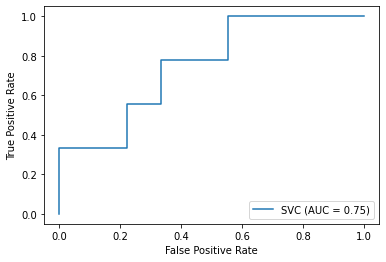

In [215]:
metrics.plot_roc_curve(classifier_SVM,test_x_df,test_y_df)

In [216]:
precision_recall_fscore_support(test_y_df,y_pred_SVM) 

(array([0.53846154, 0.6       ]),
 array([0.77777778, 0.33333333]),
 array([0.63636364, 0.42857143]),
 array([9, 9]))

In [217]:
accuracy_score(test_y_df,y_pred_SVM)

0.5555555555555556

In [218]:
classifier_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# 2. Predicting output using KNN classifier

In [219]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(train_x_df,train_y_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [220]:
y_pred_KNN = classifier_KNN.predict(test_x_df)

In [221]:
cross_val_score(classifier_KNN,train_x_df,train_y_df,cv=5,scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

array([1.  , 1.  , 0.75, 0.75, 1.  ])

In [222]:
cnf_matrix_KNN = confusion_matrix(y_pred_KNN,test_y_df)
cnf_matrix_KNN

array([[3, 0],
       [6, 9]])

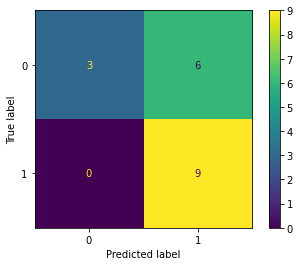

In [223]:
plot_confusion_matrix(classifier_KNN,test_x_df,test_y_df) 

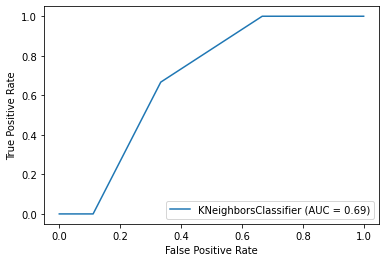

In [224]:
metrics.plot_roc_curve(classifier_KNN, test_x_df,test_y_df)

In [225]:
precision_recall_fscore_support(test_y_df,y_pred_KNN) 

(array([1. , 0.6]),
 array([0.33333333, 1.        ]),
 array([0.5 , 0.75]),
 array([9, 9]))

In [226]:
accuracy_score(test_y_df,y_pred_SVM)

0.5555555555555556

In [227]:
classifier_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# 3. Predicting output using Neural network classifier

In [228]:
from sklearn.neural_network import MLPClassifier
classifier_MLP = MLPClassifier(random_state=1, max_iter=300)
classifier_MLP.fit(train_x_df,train_y_df)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [229]:
y_pred_MLP = classifier_MLP.predict(test_x_df)

In [230]:
cross_val_score(classifier_MLP,train_x_df,train_y_df,cv=5,scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

array([0.5  , 0.5  , 0.125, 0.75 , 1.   ])

In [231]:
cnf_matrix_MLP = confusion_matrix(y_pred_MLP,test_y_df)
cnf_matrix_MLP

array([[2, 1],
       [7, 8]])

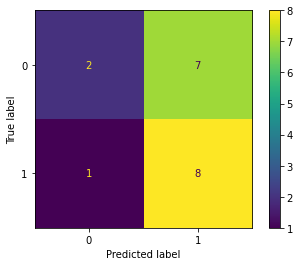

In [232]:
plot_confusion_matrix(classifier_MLP, test_x_df,test_y_df) 

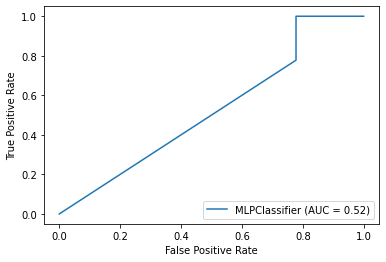

In [233]:
metrics.plot_roc_curve(classifier_MLP, test_x_df,test_y_df)

In [234]:
precision_recall_fscore_support(test_y_df,y_pred_mask_MLP)

(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([9, 9]))

In [235]:
accuracy_score(test_y_df,y_pred_mask_MLP)

1.0

In [236]:
classifier_MLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**End of the Project**